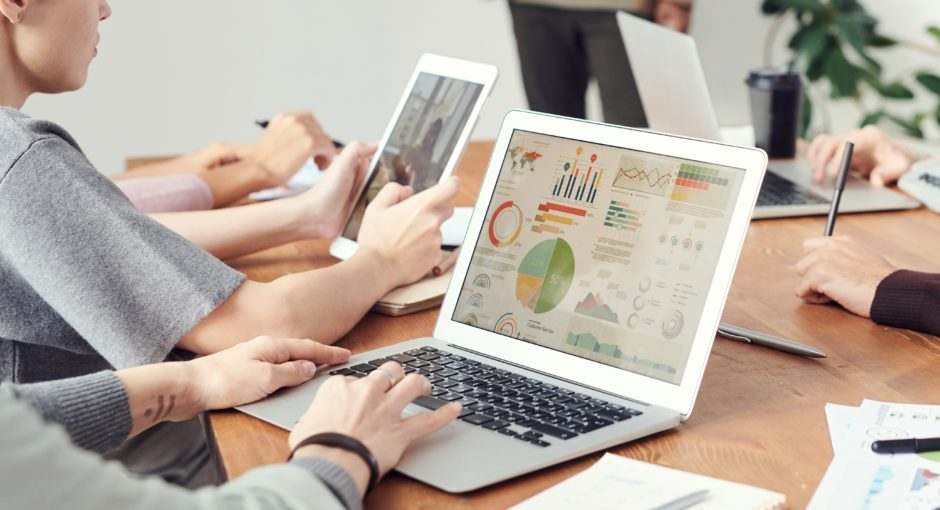

In [216]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import libraries**

In [217]:
#basic lib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#model building lib
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import joblib

**Load dataset**

In [218]:
df=pd.read_csv('/content/drive/MyDrive/ds/Bank Customer Churn Prediction.csv')

In [219]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [220]:
df.tail()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [221]:
print("No of rows:",df.shape[0])
print("No of columns:",df.shape[1])

No of rows: 10000
No of columns: 12


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


**MISSING VALUES**

In [223]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

**Descriptive Statistics**

Anomalies detection

In [224]:
df.describe()


,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Through the mean and max of the above variables, we can see that there are no outliers.

**Dropping Irrelavant Columns**

In [225]:
df=df.drop(['customer_id'],axis=1)

In [226]:
df.columns

Index(['credit_score', 'country', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn'],
      dtype='object')



---


*   The columns provided can be crucial in predicting churn. Each feature provides valuable information about the customers and their interactions with the bank.





1. **'Credit score'**: Customers with higher credit scores are generally more financially stable and reliable, which may make them less likely to churn.
2. **'country’**: Different countries may have varying economic conditions, banking regulations, and customer behavior, which can influence churn rates.
3. **'gender’**: This feature might provide insights into gender-based differences in customer loyalty and churn behavior.
4. **'age’**: Older customers often have longer relationships with the bank and are more likely to have established loyalty, making them less prone to churn.
5. **'tenure’**: Longer tenure indicates greater loyalty and a lower likelihood of churn compared to newer customers.
6. **'balance’**: Customers with higher account balances are generally more invested in the bank's services, making them less likely to churn.
7. **'products number’**: Customers using more products/services from the bank are more deeply engaged, making them less likely to churn.
8. **'credit card’**: Customers with credit cards may have higher engagement with the bank, increasing their loyalty and reducing churn.
9. **'active member’**: Active members are more likely to be engaged with the bank's offerings, leading to decreased churn rates.
10. **'estimated salary’**: Customers with higher salaries may have more stable financial situations and be less likely to churn due to financial reasons.

11. **'churn’**: The target variable indicating whether the customer left the  
bank or not. This is the  variable to be  predicted using machine learning.

In [227]:
categorical_features=[]
numerical_features=[]
for column in df.columns:
  if df[column].nunique()>10:
   numerical_features.append(column)
  else:
   categorical_features.append(column)

In [228]:
categorical_features

['country',
 'gender',
 'products_number',
 'credit_card',
 'active_member',
 'churn']

In [229]:
numerical_features

['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']

**2. Data Exploration Analysis**

Exploring the relationships between different features and their impact on the target variable

**2.1 Bivariant Analysis**

**Visualizing categorical features**

*   Country
*   Gender
*   Credit_card
*  Active_member



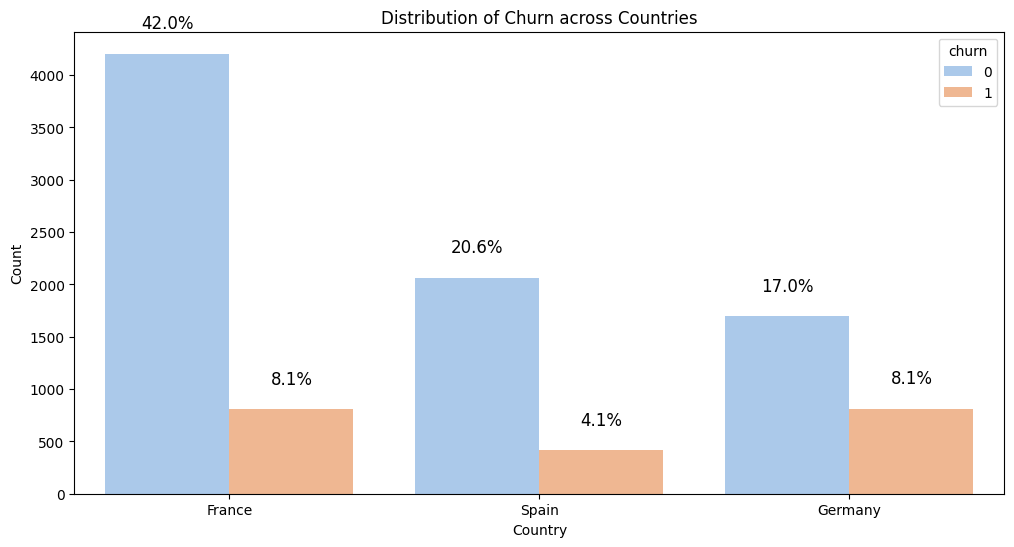

In [230]:
plt.figure(figsize=(12, 6))

# Creating the bar plot with Seaborn

ax=sns.countplot(data=df, x='country', hue='churn', palette='pastel')

# Adding labels and title
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Distribution of Churn across Countries')

# Calculate the total count for all bars
total = len(df['churn'])

# Annotate percentage on top of each bar

for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2, height + 200),
                ha='center', va='bottom', fontsize=12)

# Display the plot
plt.show()


1.   France has the highest number of customers, the churn percentage is
relatively lower compared to the other two countries.

2.  Spain, although close to France in terms of churn percentage, has a slightly higher churn percentage than France.

3.  Germany has the highest churn percentage, indicating that customers from Germany are more likely to churn compared to customers from France or Spain.


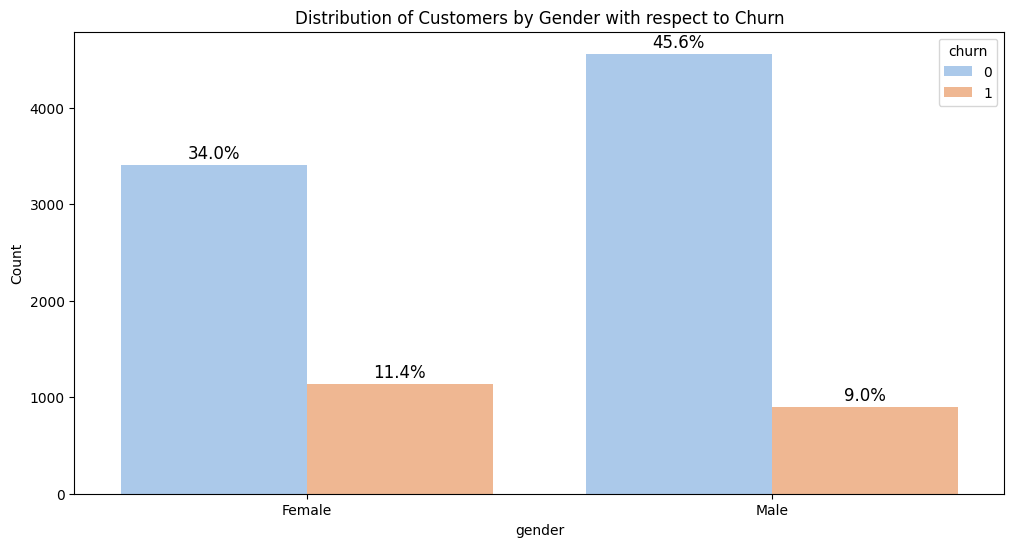

In [231]:
plt.figure(figsize=(12, 6))

# Creating the bar plot with Seaborn

ax=sns.countplot(data=df, x='gender', hue='churn', palette='pastel')

# Adding labels and title
plt.xlabel('gender')
plt.ylabel('Count')
plt.title('Distribution of Customers by Gender with respect to Churn')

# Calculate the total count for all bars
total = len(df['churn'])

# Annotate percentage on top of each bar

for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2, height + 25),
                ha='center', va='bottom', fontsize=12)

# Display the plot
plt.show()




1.   The dataset has more male customers than female customers.
2.   There is a higher churn rate among female customers compared to male customers.

3.   While the churn rate difference between genders is not very large, the higher churn rate among females suggests they are more likely to leave the bank than male customers.




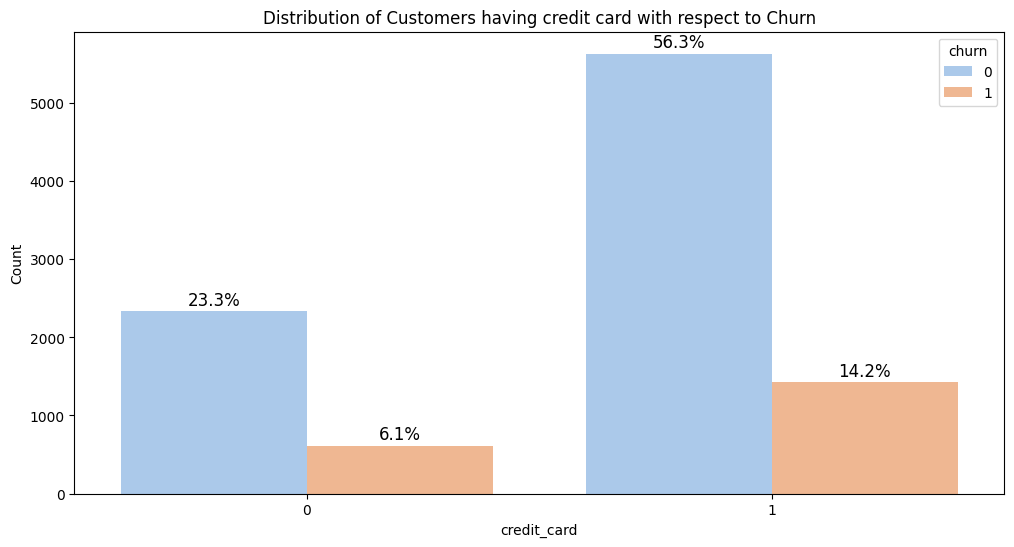

In [232]:
plt.figure(figsize=(12, 6))

# Creating the bar plot with Seaborn

ax=sns.countplot(data=df, x='credit_card', hue='churn', palette='pastel')

# Adding labels and title
plt.xlabel('credit_card')
plt.ylabel('Count')
plt.title('Distribution of Customers having credit card with respect to Churn')

# Calculate the total count for all bars
total = len(df['churn'])

# Annotate percentage on top of each bar

for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2, height + 25),
                ha='center', va='bottom', fontsize=12)

# Display the plot
plt.show()

Bank customers with a credit card churn the most compared to customers who do not have a credit card .

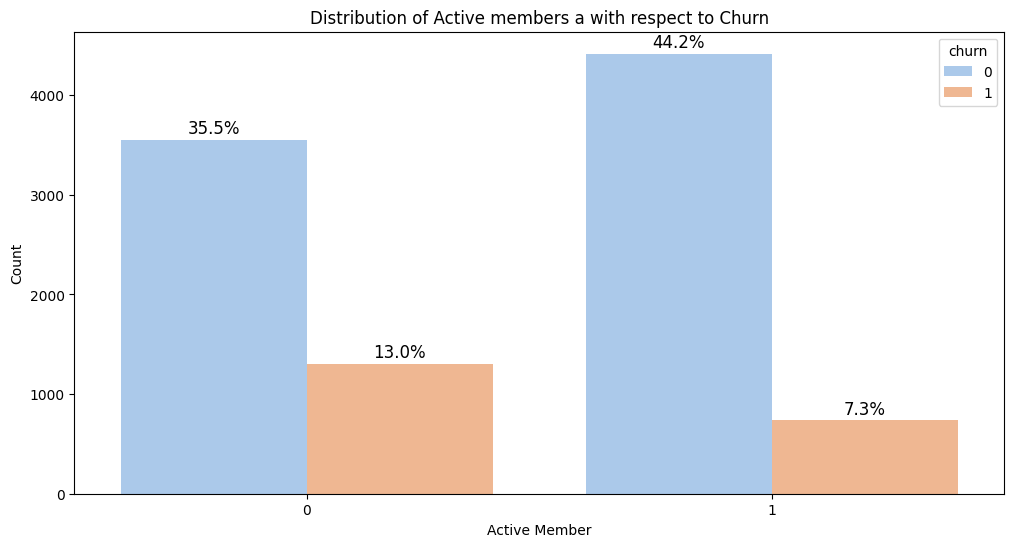

In [233]:
plt.figure(figsize=(12, 6))

# Creating the bar plot with Seaborn

ax=sns.countplot(data=df, x='active_member', hue='churn', palette='pastel')

# Adding labels and title
plt.xlabel('Active Member')
plt.ylabel('Count')
plt.title('Distribution of Active members a with respect to Churn')

# Calculate the total count for all bars
total = len(df['churn'])

# Annotate percentage on top of each bar

for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2, height + 25),
                ha='center', va='bottom', fontsize=12)

# Display the plot
plt.show()

1.    It appears that even though the exposure  is relatively similar between active_member groups 0 and 1, there is a larger churn count in the non-active_member group.
2. customers who are not active members are more likely to churn compared to active members.

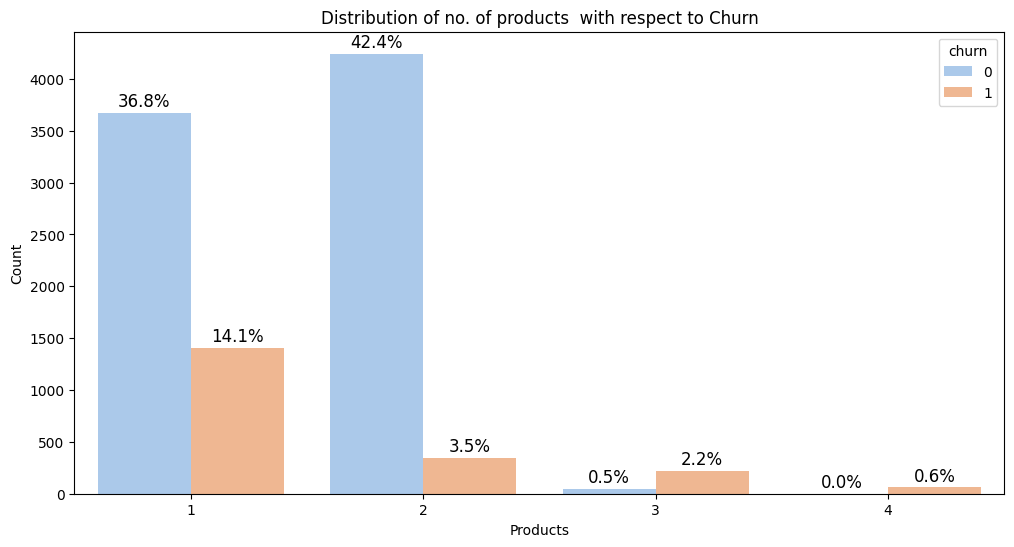

In [234]:
plt.figure(figsize=(12, 6))

# Creating the bar plot with Seaborn

ax=sns.countplot(data=df, x='products_number', hue='churn', palette='pastel')

# Adding labels and title
plt.xlabel('Products')
plt.ylabel('Count')
plt.title('Distribution of no. of products  with respect to Churn')

# Calculate the total count for all bars
total = len(df['churn'])

# Annotate percentage on top of each bar

for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2, height + 25),
                ha='center', va='bottom', fontsize=12)

# Display the plot
plt.show()



*   Bank customers who purchased at least 1 product through the bank have a larger churn percentage than other categories with a percentage of 14.1%.




**Visualizing numerical features**

*   Credit_score
*   Age
*   Tenure
*   Balance



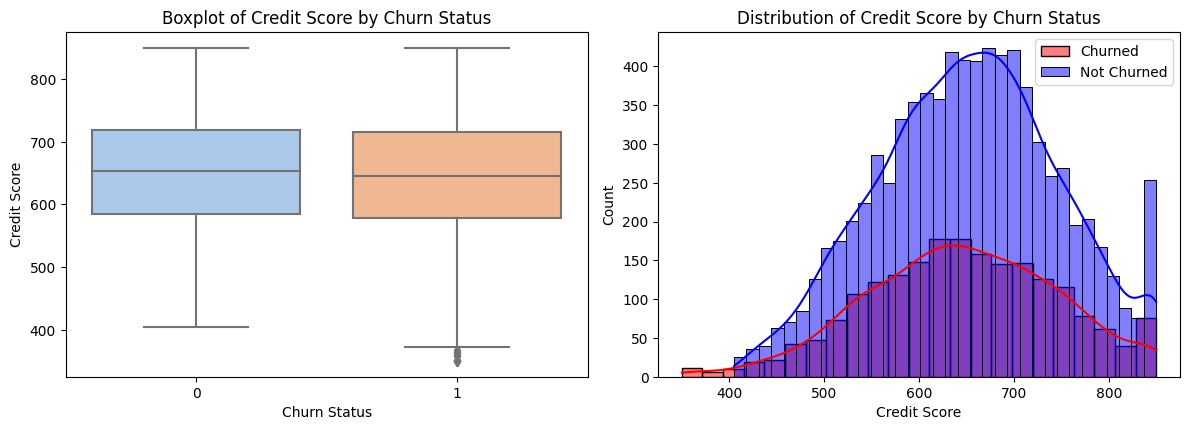

In [235]:
plt.figure(figsize=(12, 8))

# First subplot - Boxplot for Credit Score
ax1 = plt.subplot(2, 2, 1)
sns.boxplot(x='churn', y='credit_score', data=df, palette='pastel', ax=ax1)
plt.xlabel('Churn Status')
plt.ylabel('Credit Score')
plt.title('Boxplot of Credit Score by Churn Status')

# Second subplot - Histogram for Credit Score
ax2 = plt.subplot(2, 2, 2)
sns.histplot(df[df['churn'] == 1]['credit_score'], kde=True, color='red', label='Churned', ax=ax2)
sns.histplot(df[df['churn'] == 0]['credit_score'], kde=True, color='blue', label='Not Churned', ax=ax2)
plt.xlabel('Credit Score')
plt.title('Distribution of Credit Score by Churn Status')
plt.legend()

plt.tight_layout()
plt.show()

The chart above shows the distribution of 'CreditScore' by churn status. The credit score distribution of churn and retain customers is similar, spread between 600 and 700.

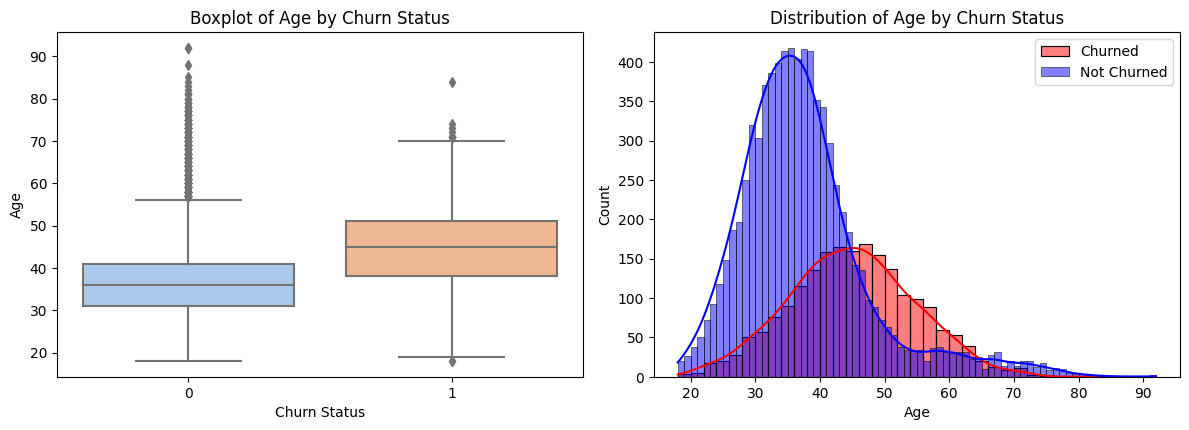

In [236]:
plt.figure(figsize=(12, 8))

# First subplot - Boxplot for Age
ax1 = plt.subplot(2, 2, 1)
sns.boxplot(x='churn', y='age', data=df, palette='pastel', ax=ax1)
plt.xlabel('Churn Status')
plt.ylabel('Age')
plt.title('Boxplot of Age by Churn Status')

# Second subplot - Histogram for Age
ax2 = plt.subplot(2, 2, 2)
sns.histplot(df[df['churn'] == 1]['age'], kde=True, color='red', label='Churned', ax=ax2)
sns.histplot(df[df['churn'] == 0]['age'], kde=True, color='blue', label='Not Churned', ax=ax2)
plt.xlabel('Age')
plt.title('Distribution of Age by Churn Status')
plt.legend()

plt.tight_layout()
plt.show()



*    The age distribution of "non-churning"and "Churned" customers appears to be relatively similar. Both groups have significant representation within the ages of 30 years to 50 years.
*   The age distribution of churning customers is mostly between the ages of 40 years and 50 years. This could indicate a relatively higher concentration of retained customers in this age range.





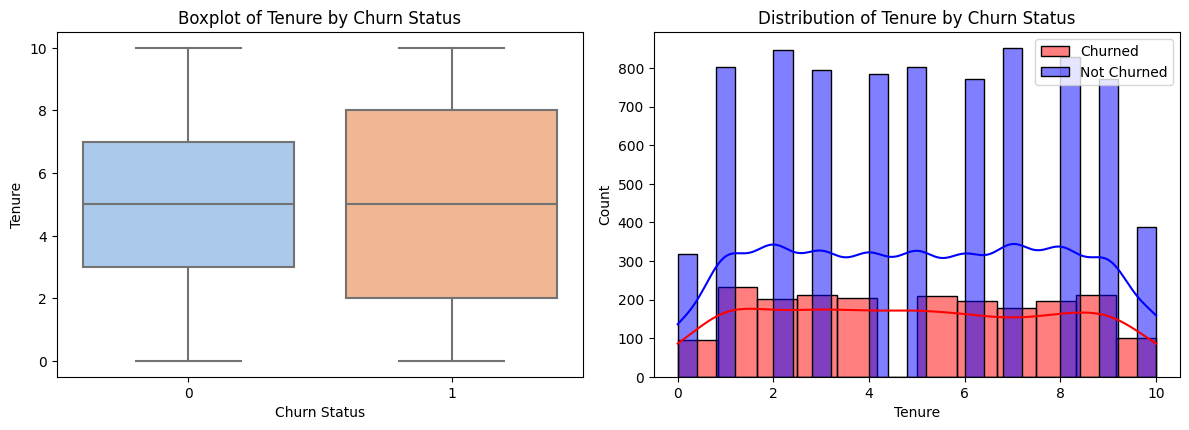

In [237]:
plt.figure(figsize=(12, 8))

# First subplot - Boxplot for Tenure
ax1 = plt.subplot(2, 2, 1)
sns.boxplot(x='churn', y='tenure', data=df, palette='pastel', ax=ax1)
plt.xlabel('Churn Status')
plt.ylabel('Tenure')
plt.title('Boxplot of Tenure by Churn Status')

# Second subplot - Histogram for Tenure
ax2 = plt.subplot(2, 2, 2)
sns.histplot(df[df['churn'] == 1]['tenure'], kde=True, color='red', label='Churned', ax=ax2)
sns.histplot(df[df['churn'] == 0]['tenure'], kde=True, color='blue', label='Not Churned', ax=ax2)
plt.xlabel('Tenure')
plt.title('Distribution of Tenure by Churn Status')
plt.legend()

plt.tight_layout()
plt.show()

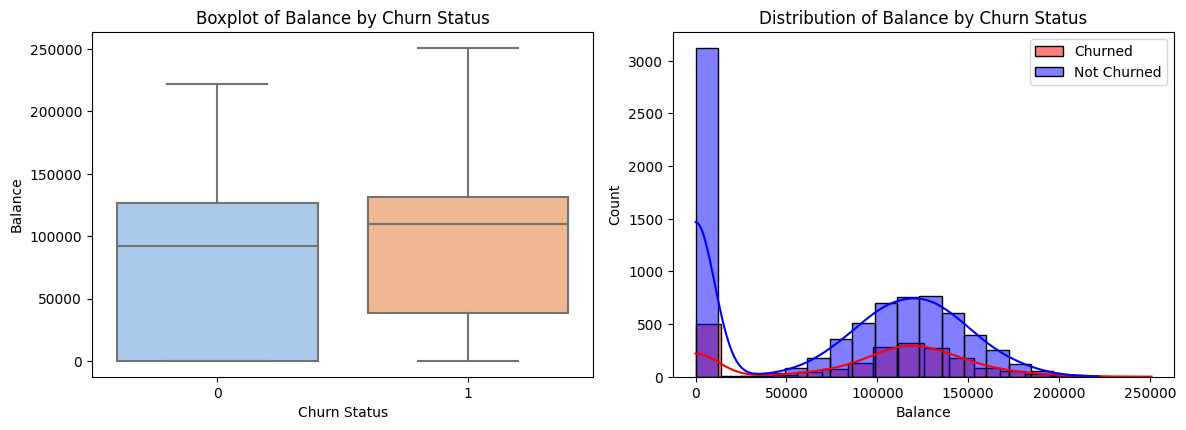

In [238]:
plt.figure(figsize=(12, 8))

# First subplot - Boxplot for Balance
ax1 = plt.subplot(2, 2, 1)
sns.boxplot(x='churn', y='balance', data=df, palette='pastel', ax=ax1)
plt.xlabel('Churn Status')
plt.ylabel('Balance')
plt.title('Boxplot of Balance by Churn Status')

# Second subplot - Histogram for Balance
ax2 = plt.subplot(2, 2, 2)
sns.histplot(df[df['churn'] == 1]['balance'], kde=True, color='red', label='Churned', ax=ax2)
sns.histplot(df[df['churn'] == 0]['balance'], kde=True, color='blue', label='Not Churned', ax=ax2)
plt.xlabel('Balance')
plt.title('Distribution of Balance by Churn Status')
plt.legend()

plt.tight_layout()
plt.show()





*   The graph above shows the distribution of 'Balance' based on churn status.
*    The balance distribution of churn customers is spread between 40,000 and 125,000. While the balance distribution of retain customers is spread between 0 and 125,000.




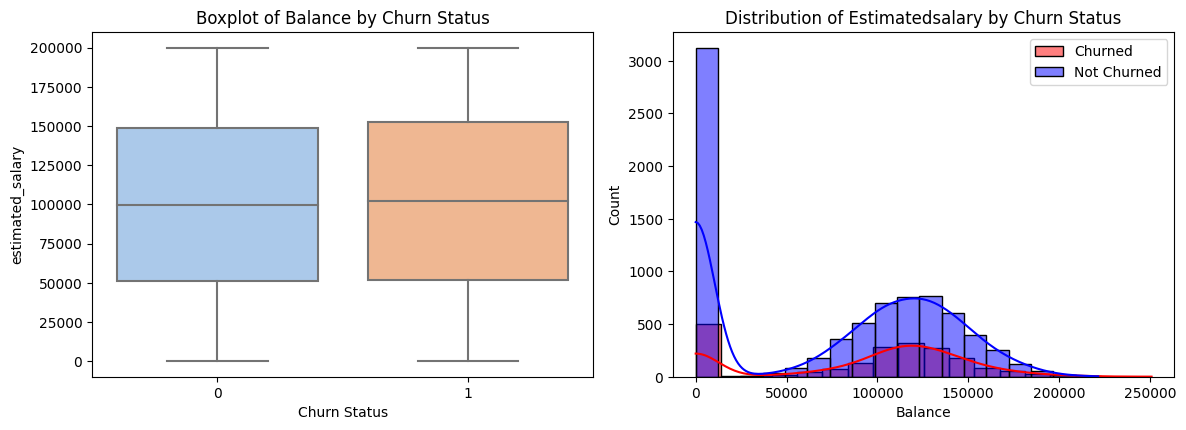

In [239]:

plt.figure(figsize=(12, 8))

# First subplot - Boxplot for Balance
ax1 = plt.subplot(2, 2, 1)
sns.boxplot(x='churn', y='estimated_salary', data=df, palette='pastel', ax=ax1)
plt.xlabel('Churn Status')
plt.ylabel('estimated_salary')
plt.title('Boxplot of Balance by Churn Status')

# Second subplot - Histogram for Balance
ax2 = plt.subplot(2, 2, 2)
sns.histplot(df[df['churn'] == 1]['balance'], kde=True, color='red', label='Churned', ax=ax2)
sns.histplot(df[df['churn'] == 0]['balance'], kde=True, color='blue', label='Not Churned', ax=ax2)
plt.xlabel('Balance')
plt.title('Distribution of Estimatedsalary by Churn Status')
plt.legend()

plt.tight_layout()
plt.show()


**Categorical Variable Encoding**

In [240]:
df['country'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [241]:
df=pd.get_dummies(df,drop_first=True)

In [242]:
df.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


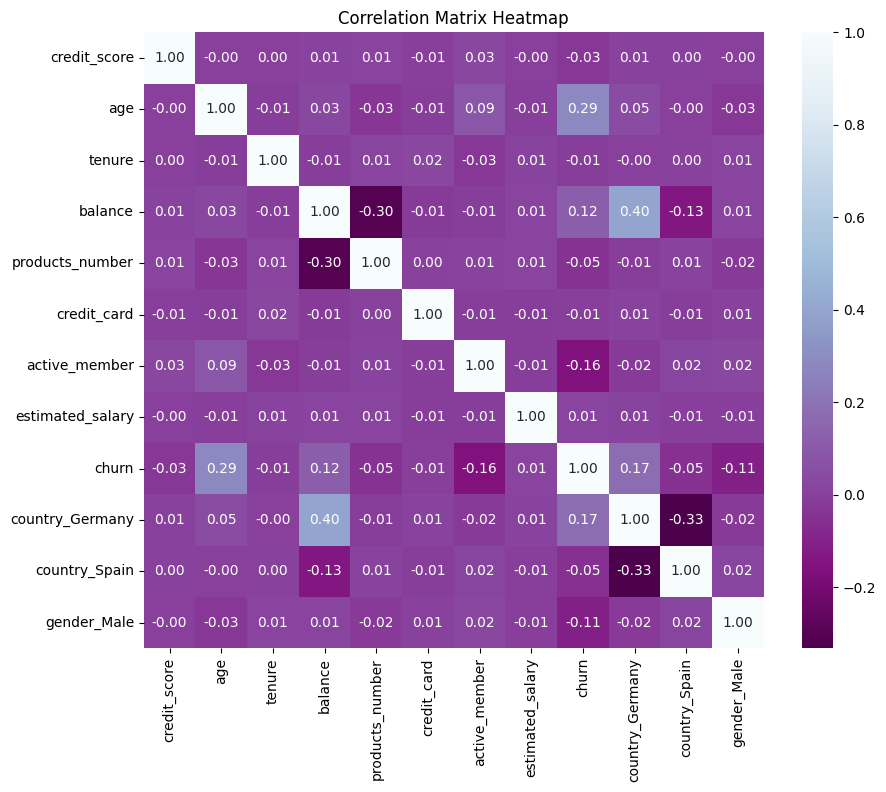

In [243]:
plt.figure(figsize=(10, 8))

# Creating the heatmap with Seaborn
sns.heatmap(df.corr(), annot=True,cmap=plt.cm.BuPu_r,  fmt='.2f')

# Adding title
plt.title('Correlation Matrix Heatmap')

# Display the plot
plt.show()


 Heatmaps can show the correlation between different numerical features.



1.   A positive correlation between 'age' and 'churn' (0.29) indicates that older customers are more likely to churn.
2.    A positive correlation between 'balance' and 'churn' (0.12) suggests that customers with higher balances are also more likely to churn.








In [244]:
def correlation(dataset, threshold):
    col_corr = set()  # Set to store names of correlated columns
    corr_matrix = dataset.corr()  # Calculate the correlation matrix

    # Iterate over each column in the correlation matrix
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            # Check if the absolute correlation coefficient is greater than the threshold
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]  # Get the name of the column
                col_corr.add(colname)  # Add the column name to the set

    return col_corr  # Return the set of correlated column names


In [245]:
corr_features=correlation(df, 0.7)
len(set(corr_features))

0

*   The  above results shows that there are not many features that are strongly correlated linearly with the target. This means that most of the correlations contained in the dataset are non-linear.
*    Based on this, the appropriate model to use is a model that has good performance on datasets that have many non-linear correlations such as Decision Trees, Gradient Boosting, Neural Networks, and Support Vector Machines (SVM).

In [246]:
df["churn"].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

<Axes: xlabel='churn', ylabel='count'>

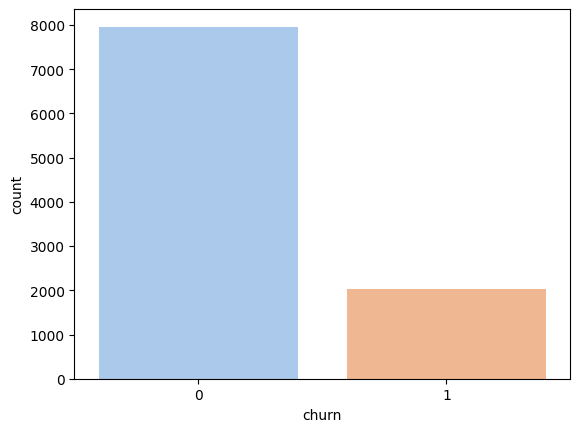

In [247]:
sns.countplot(x='churn',data=df,palette='pastel')




*   One class (the minority class) has significantly fewer instances than another class (the majority class).
*   This class imbalance can lead to challenges and biases when developing a predictive model.

*   In this dataset, the majority of customers do not churn. As a result, the data is skewed, and our modeling without addressing this skewness could lead to a lot of false negatives. To address this issue,  oversampling method can be used to balance the class distribution






**HANDLING IMBALANCE DATA  using SMOTE**

1.   Oversampling
2.   Undersampling
3.SMOTE





In [248]:
X=df.drop('churn',axis=1)

In [249]:
X.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_Germany,country_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [250]:
X.columns

Index(['credit_score', 'age', 'tenure', 'balance', 'products_number',
       'credit_card', 'active_member', 'estimated_salary', 'country_Germany',
       'country_Spain', 'gender_Male'],
      dtype='object')

In [251]:
y=df['churn']

In [252]:
from imblearn.over_sampling import SMOTE

In [253]:
X_res,y_res=SMOTE().fit_resample(X,y)

In [254]:
y_res.value_counts()

1    7963
0    7963
Name: churn, dtype: int64





1.  Synthetic samples are created for the minority class, increasing its representation. These synthetic samples are generated by interpolating between neighboring instances of the minority class.


2.   Now that the data is balanced, we can proceed with our further steps.




**Train-Test-Split**

In [255]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.2,random_state=42)

**Feature Scaling**

In [256]:
sc=StandardScaler()

In [257]:
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)


In [258]:
X_train

array([[ 1.4622784 ,  0.2016151 ,  0.81255657, ..., -0.57916299,
        -0.46012793, -0.84347226],
       [ 1.09258219,  0.10151079, -1.39249257, ..., -0.57916299,
        -0.46012793,  1.18557544],
       [-0.4840634 ,  0.40182371, -1.02498438, ..., -0.57916299,
        -0.46012793, -0.84347226],
       ...,
       [ 0.20096193,  0.2016151 ,  1.18006476, ..., -0.57916299,
        -0.46012793,  1.18557544],
       [ 0.6685189 ,  0.2016151 , -0.289968  , ...,  1.72662966,
        -0.46012793, -0.84347226],
       [ 0.52716446,  1.00244953, -1.39249257, ...,  1.72662966,
        -0.46012793,  1.18557544]])

**MODEL BUILDING**

In [259]:
def plot_cm(cm, chart):

    # Set figure size and title
    plt.figure(figsize=(6, 5))
    plt.suptitle(f'Confusion Matrix of {chart}', y=1)

    # Define confusion matrix labels and percentages
    group_names = ['True Negative', 'False Negative', 'False Positive', 'True Positive']
    group_initials = ['(TN)', '(FN)', '(FP)', '(TP)']
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]

    # Create label strings with counts and percentages
    labels = [f"{v1}\n{v2}\n\n{v3}" for v1, v2, v3 in zip(group_names, group_initials, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    # Plot heatmap of the confusion matrix
    sns.heatmap(cm, annot=labels, fmt='', cmap='BuPu_r', annot_kws={"size": 12})
    plt.xlabel('Actual')
    plt.ylabel('Predicted')

    plt.show()

**Logistic Regression**

In [260]:
model_log=LogisticRegression()
model_log.fit(X_train,y_train)


# make predictions on the test data
y_pred_log=model_log.predict(X_test)

# calculate metric evaluation and confusion matrix
accuracy_log= accuracy_score(y_test, y_pred_log)
recall_log = recall_score(y_test,y_pred_log)
cm= confusion_matrix(y_test, y_pred_log)
roc_auc_log=roc_auc_score(y_test, y_pred_log)

# print the result
print("              Logistic regression")
print("="*55)
print("Recall       :", recall_log)
print("ROC-AUC Score:",roc_auc_log )

print("="*55)
print("Classification Report:\n\n", classification_report(y_test, y_pred_log))
print("="*55)

print("Confusion Matrix:\n\n", cm)
print("="*55)

              Logistic regression
Recall       : 0.784932388924662
ROC-AUC Score: 0.7788715833171994
Classification Report:

               precision    recall  f1-score   support

           0       0.79      0.77      0.78      1633
           1       0.77      0.78      0.78      1553

    accuracy                           0.78      3186
   macro avg       0.78      0.78      0.78      3186
weighted avg       0.78      0.78      0.78      3186

Confusion Matrix:

 [[1262  371]
 [ 334 1219]]


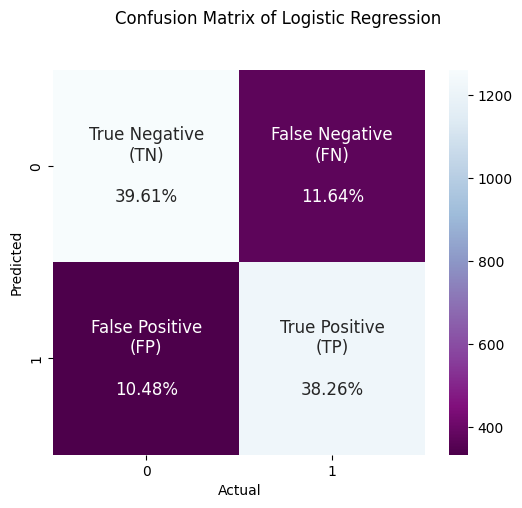

In [261]:
chart = 'Logistic Regression'

# plot the confusion matrix
plot_cm(cm, chart)

**Support vector classifier**

In [262]:
model_svc=svm.SVC()
model_svc.fit(X_train,y_train)


# make predictions on the test data
y_pred_svc=model_svc.predict(X_test)

# calculate metric evaluation and confusion matrix
accuracy_svc= accuracy_score(y_test, y_pred_svc)
recall_svc = recall_score(y_test,y_pred_svc)
cm= confusion_matrix(y_test, y_pred_svc)
roc_auc_svc=roc_auc_score(y_test, y_pred_svc)
# print the result
print("              Support vector classifier")
print("="*55)
print("Recall       :", recall_svc)
print("ROC-AUC Score:",roc_auc_svc )

print("="*55)
print("Classification Report:\n\n", classification_report(y_test, y_pred_svc))
print("="*55)

print("Confusion Matrix:\n\n", cm)
print("="*55)

              Support vector classifier
Recall       : 0.8377334191886671
ROC-AUC Score: 0.8377277016335253
Classification Report:

               precision    recall  f1-score   support

           0       0.84      0.84      0.84      1633
           1       0.83      0.84      0.83      1553

    accuracy                           0.84      3186
   macro avg       0.84      0.84      0.84      3186
weighted avg       0.84      0.84      0.84      3186

Confusion Matrix:

 [[1368  265]
 [ 252 1301]]


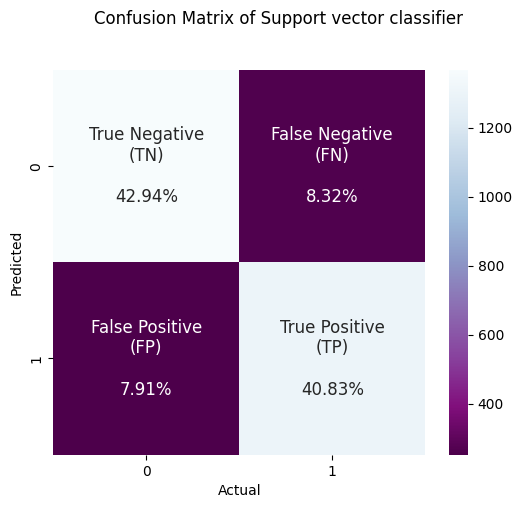

In [263]:
chart = 'Support vector classifier'

# plot the confusion matrix
plot_cm(cm, chart)

**KNeighbour Classifier**

In [264]:
model_knn=KNeighborsClassifier()
model_knn.fit(X_train,y_train)

# make predictions on the test data
y_pred_knn=model_knn.predict(X_test)

# calculate metric evaluation and confusion matrix
accuracy_knn= accuracy_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
cm = confusion_matrix(y_test, y_pred_knn)
roc_auc_knn=roc_auc_score(y_test, y_pred_knn)

# print the result
print("              KNeighbour Classifier")
print("="*55)
print("Recall       :", recall_knn)
print("ROC-AUC Score:", roc_auc_knn)

print("="*55)
print("Classification Report:\n\n", classification_report(y_test, y_pred_knn))
print("="*55)

print("Confusion Matrix:\n\n", cm)
print("="*55)

              KNeighbour Classifier
Recall       : 0.824211204121056
ROC-AUC Score: 0.8098398335363395
Classification Report:

               precision    recall  f1-score   support

           0       0.83      0.80      0.81      1633
           1       0.79      0.82      0.81      1553

    accuracy                           0.81      3186
   macro avg       0.81      0.81      0.81      3186
weighted avg       0.81      0.81      0.81      3186

Confusion Matrix:

 [[1299  334]
 [ 273 1280]]


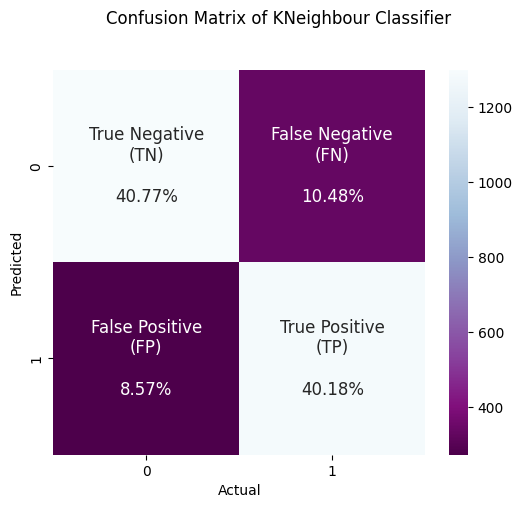

In [265]:
chart = 'KNeighbour Classifier'

# plot the confusion matrix
plot_cm(cm, chart)

**Decision Tree Classifier**

In [266]:
model_dt= DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

# make predictions on the test data
y_pred = model_dt.predict(X_test)

# calculate metric evaluation and confusion matrix
accuracy_dt=accuracy_score(y_test, y_pred)
recall_dt= recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
roc_auc_dt=roc_auc_score(y_test, y_pred)

# print the result
print("             Decision Tree Classifier")
print("="*55)
print("Recall       :", recall_dt)
print("ROC-AUC Score:", roc_auc_dt)

print("="*55)
print("Classification Report:\n\n", classification_report(y_test, y_pred))
print("="*55)

print("Confusion Matrix:\n\n", cm)
print("="*55)

             Decision Tree Classifier
Recall       : 0.8074694140373471
ROC-AUC Score: 0.7910586506806453
Classification Report:

               precision    recall  f1-score   support

           0       0.81      0.77      0.79      1633
           1       0.77      0.81      0.79      1553

    accuracy                           0.79      3186
   macro avg       0.79      0.79      0.79      3186
weighted avg       0.79      0.79      0.79      3186

Confusion Matrix:

 [[1265  368]
 [ 299 1254]]


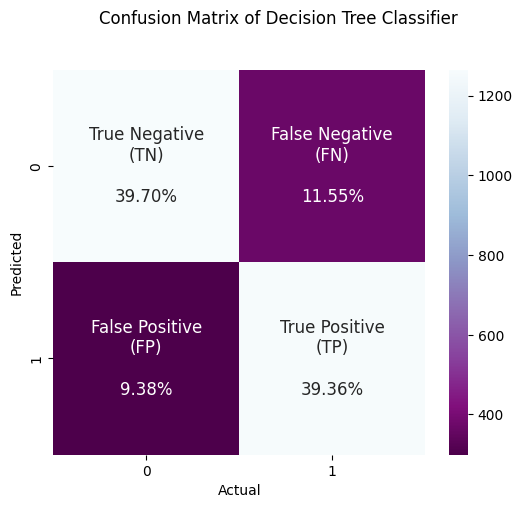

In [267]:
chart = 'Decision Tree Classifier'

# plot the confusion matrix
plot_cm(cm, chart)

**Random Forest classifier**

In [268]:
model_rf= RandomForestClassifier()

# Fit the RandomForestClassifier on the training data
model_rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model_rf.predict(X_test)

# Calculate metric evaluation and confusion matrix
accuracy_rf = accuracy_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
roc_auc_rf=roc_auc_score(y_test, y_pred)


# Print the results
print("             Random Forest Classifier")
print("="*55)
print("Recall       :", recall_rf)
print("ROC-AUC Score:", roc_auc_rf)

print("="*55)
print("Classification Report:\n\n", classification_report(y_test, y_pred))
print("="*55)

print("Confusion Matrix:\n\n", cm)
print("="*55)

             Random Forest Classifier
Recall       : 0.8654217643271088
ROC-AUC Score: 0.8635130866950914
Classification Report:

               precision    recall  f1-score   support

           0       0.87      0.86      0.87      1633
           1       0.86      0.87      0.86      1553

    accuracy                           0.86      3186
   macro avg       0.86      0.86      0.86      3186
weighted avg       0.86      0.86      0.86      3186

Confusion Matrix:

 [[1407  226]
 [ 209 1344]]


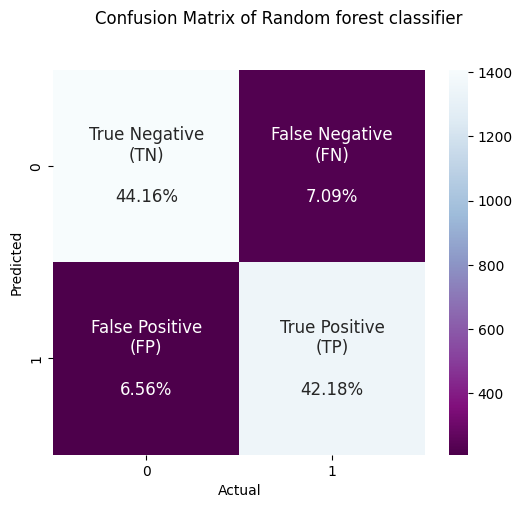

In [269]:
chart = 'Random forest classifier'

# plot the confusion matrix
plot_cm(cm, chart)

**Gradient Boosting Classifier**

In [270]:
model_gb=GradientBoostingClassifier()

# Fit the RandomForestClassifier on the training data
model_gb.fit(X_train,y_train)

# Make predictions on the test data
y_pred_gb=model_gb.predict(X_test)

# Calculate metric evaluation and confusion matrix
accuracy_gb = accuracy_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
cm = confusion_matrix(y_test, y_pred_gb)
roc_auc_gb=roc_auc_score(y_test, y_pred_gb)

# Print the results
print("            Gradient Boosting Classifier")
print("="*55)
print("Recall       :", recall_gb)
print("ROC-AUC Score:", roc_auc_gb)

print("="*55)
print("Classification Report:\n\n", classification_report(y_test, y_pred_gb))
print("="*55)

print("Confusion Matrix:\n\n", cm)
print("="*55)

            Gradient Boosting Classifier
Recall       : 0.8274307791371539
ROC-AUC Score: 0.835025861093378
Classification Report:

               precision    recall  f1-score   support

           0       0.84      0.84      0.84      1633
           1       0.83      0.83      0.83      1553

    accuracy                           0.84      3186
   macro avg       0.84      0.84      0.84      3186
weighted avg       0.84      0.84      0.84      3186

Confusion Matrix:

 [[1376  257]
 [ 268 1285]]


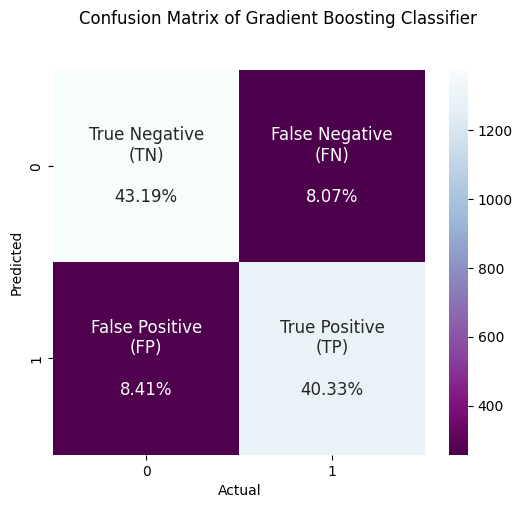

In [271]:
chart = 'Gradient Boosting Classifier'

# plot the confusion matrix
plot_cm(cm, chart)

**ANN**

In [272]:
#Create a sequential model
model_ann=Sequential()
#Add a hidden layer with 11 units and relu activation function, expecting input of dimension 11
model_ann.add(Dense(11,activation='relu',input_dim=11))
#Add a hidden layer with 11 units
model_ann.add(Dense(11,activation='relu'))
#Add an output layer with 1 unit and sigmoid activation function
model_ann.add(Dense(1,activation='sigmoid'))

In [273]:
X_train.shape[1]

11

In [274]:
import tensorflow as tf
from tensorflow import keras


model_ann= keras.Sequential([
    keras.layers.Dense(64, input_shape=(11,), activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model_ann.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_ann.fit(X_train, y_train, epochs=100,validation_split=0.2)

Epoch 1/100
319/319 [==============================] - 2s 3ms/step - loss: 0.4655 - accuracy: 0.7863 - val_loss: 0.4318 - val_accuracy: 0.7991
Epoch 2/100
319/319 [==============================] - 1s 3ms/step - loss: 0.4133 - accuracy: 0.8122 - val_loss: 0.4019 - val_accuracy: 0.8206
Epoch 3/100
319/319 [==============================] - 1s 3ms/step - loss: 0.3985 - accuracy: 0.8210 - val_loss: 0.3873 - val_accuracy: 0.8218
Epoch 4/100
319/319 [==============================] - 1s 4ms/step - loss: 0.3909 - accuracy: 0.8261 - val_loss: 0.3851 - val_accuracy: 0.8199
Epoch 5/100
319/319 [==============================] - 1s 4ms/step - loss: 0.3843 - accuracy: 0.8294 - val_loss: 0.3798 - val_accuracy: 0.8285
Epoch 6/100
319/319 [==============================] - 1s 4ms/step - loss: 0.3809 - accuracy: 0.8310 - val_loss: 0.3783 - val_accuracy: 0.8261
Epoch 7/100
319/319 [==============================] - 1s 2ms/step - loss: 0.3776 - accuracy: 0.8337 - val_loss: 0.3752 - val_accuracy: 0.8187

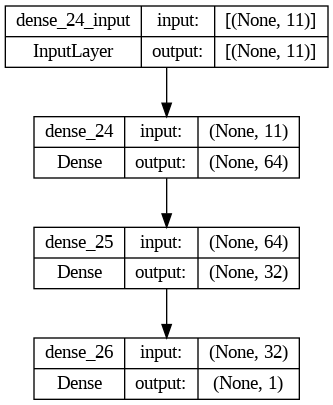

In [275]:
tf.keras.utils.plot_model(model_ann, show_shapes=True)

In [276]:
#Print a summary of the model architecture
model_ann.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 64)                768       
                                                                 
 dense_25 (Dense)            (None, 32)                2080      
                                                                 
 dense_26 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [277]:
yp = model_ann.predict(X_test)
yp[:5]

100/100 [==============================] - 0s 2ms/step


array([[0.01026972],
       [0.9376311 ],
       [0.01451585],
       [0.9771887 ],
       [0.27761617]], dtype=float32)

In [278]:
y_pred_ann= []
for element in yp:
    if element > 0.5:
        y_pred_ann.append(1)
    else:
        y_pred_ann.append(0)

In [279]:
print(classification_report(y_test,y_pred_ann))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82      1633
           1       0.80      0.85      0.82      1553

    accuracy                           0.82      3186
   macro avg       0.82      0.82      0.82      3186
weighted avg       0.82      0.82      0.82      3186



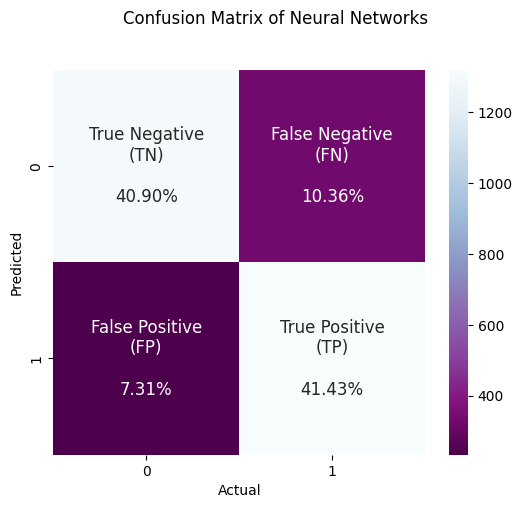

In [280]:
cm = confusion_matrix(y_test,y_pred_ann)
chart = 'Neural Networks '

# plot the confusion matrix
plot_cm(cm, chart)

**Model Evaluation**

In [281]:
final_data=pd.DataFrame({'MODELS':['model_log','model_svc','model_knn','model_dt','model_rf','model_gb'],
                         'Recall Scores':[recall_log,recall_svc,recall_knn,recall_dt,recall_rf,recall_gb],
                         'ROC-AUC Scores':[roc_auc_log,roc_auc_svc,roc_auc_knn,roc_auc_dt,roc_auc_rf,roc_auc_gb],
                         'Accuracy':[accuracy_log,accuracy_svc,accuracy_knn,accuracy_dt,accuracy_rf,accuracy_gb]})

In [282]:
final_data

,MODELS,Recall Scores,ROC-AUC Scores,Accuracy
0,model_log,0.784932,0.778872,0.778719
1,model_svc,0.837733,0.837728,0.837728
2,model_knn,0.824211,0.809840,0.809479
3,model_dt,0.807469,0.791059,0.790647
4,model_rf,0.865422,0.863513,0.863465
5,model_gb,0.827431,0.835026,0.835217



   **Metrics**




*   In this case, the most appropriate model evaluation metrics are recall and ROC-AUC. We use recall to consider the percentage of False Negatives (FN) that should be minimized, as it is vital to correctly identify as many churned customers as possible.
*    On the other hand, ROC-AUC assesses how well the model predicts each class in a balanced manner, providing insights into its overall discriminatory power.

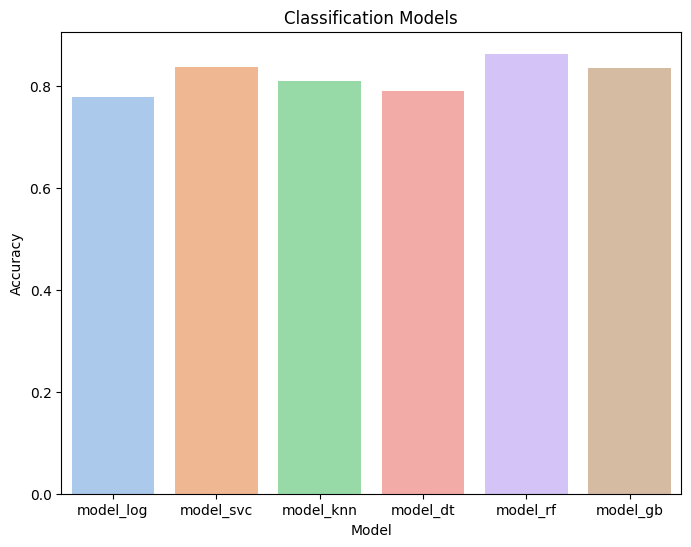

In [283]:
plt.figure(figsize=(8, 6))

# Creating the bar plot with Seaborn
sns.barplot(x=final_data['MODELS'],y=final_data['Accuracy'],palette='pastel')


# Adding labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Classification Models')

# Display the plot
plt.show()


1.   Based on the comparison, the Random Forest model (model_rf) seems to be the most suitable choice for customer churn prediction due to its higher accuracy and robustness.



2.   It can help identify customers at risk of churn, enabling the implementation of targeted retention strategies to improve customer loyalty and optimize business operations.


In [284]:
 from sklearn.metrics import roc_curve, auc

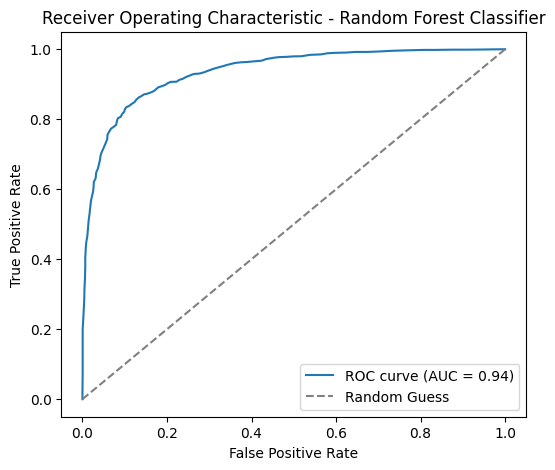

In [285]:
# Make predictions on the test data
y_prob_rf = model_rf.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (class 1)

# Compute ROC curve and AUC score for the Random Forest classifier
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot the ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr_rf, tpr_rf, label='ROC curve (AUC = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest Classifier')
plt.legend(loc='lower right')
plt.show()

The graph above shows the ROC-AUC curve with an perfect score of 0.94.

*   The graph above shows the ROC-AUC curve with an perfect score of 0.94.
*    This means that the model works well in predicting each class,further optimization will be required


**Cross Validation & Hyperparameter Tunning**

**1. Random Forest**

In [286]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

In [287]:
skf= StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [288]:
# Compute the cross-validation recall scores and ROC-AUC scores using stratified k-fold
rf_before_tuned_cv_recall_scores = cross_val_score(model_rf, X_train, y_train,
                                                  cv=skf, n_jobs=-1, scoring='recall').mean()

rf_before_tuned_cv_rocauc_scores = cross_val_score(model_rf, X_train, y_train,
                                                  cv=skf, n_jobs=-1, scoring='roc_auc').mean()

# Print the cross-validation results
print("The cross-validation recall and ROC-AUC score for untuned Random Forest after a stratified 10-fold cross-validation:")
print("Recall   :", rf_before_tuned_cv_recall_scores)
print("ROC-AUC  :", rf_before_tuned_cv_rocauc_scores)


The cross-validation recall and ROC-AUC score for untuned Random Forest after a stratified 10-fold cross-validation:
Recall   : 0.8474258970358814
ROC-AUC  : 0.9241711090244558


In [289]:
print(model_rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [290]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [291]:
# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [10, 20, 30],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'class_weight': ['balanced', 'balanced_subsample', None]
}





*   n_estimators : Number of trees in the forest

*   criterion : Function to measure the quality of a split

*   max_depth : Maximum depth of the tree

*   min_samples_split :  Minimum number of samples required to split an internal node
*   min_samples_leaf : Minimum number of samples required to be at a leaf node


*   max_features : Number of features to consider when looking for the best split


*   class_weight : Adjust weights inversely proportional to class frequencies


In [292]:
# Initialize RandomizedSearchCV objects for recall and ROC-AUC score
rf_recall = RandomizedSearchCV(model_rf, param_dist, cv=skf, n_jobs=-1, scoring='recall', random_state=42)
rf_rocauc = RandomizedSearchCV(model_rf, param_dist, cv=skf, n_jobs=-1,scoring='roc_auc', random_state=42)

# Perform randomized search for recall and ROC-AUC score
rf_recall.fit(X_train, y_train)
rf_rocauc.fit(X_train, y_train)

best_hyperparams_recall = rf_recall.best_params_
best_hyperparams_rocauc = rf_rocauc.best_params_

rf_after_tuned_cv_recall_scores = rf_recall.best_score_
rf_after_tuned_cv_rocauc_scores = rf_rocauc.best_score_


In [293]:
print("Best hyperparameters for recall and ROC-AUC:")
print("Recall :\n", best_hyperparams_recall)
print("ROC-AUC  :\n", best_hyperparams_rocauc)

print(f"\nThe cross-validation recall and ROC-AUC score for tuned Randon forest after a 10 fold cross validation:")
print("Recall :", rf_after_tuned_cv_recall_scores)
print("ROC-AUC  :", rf_after_tuned_cv_rocauc_scores)

best_rf_model = rf_recall.best_estimator_

Best hyperparameters for recall and ROC-AUC:
Recall :
 {'n_estimators': 30, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 15, 'criterion': 'entropy', 'class_weight': 'balanced'}
ROC-AUC  :
 {'n_estimators': 20, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'entropy', 'class_weight': 'balanced'}

The cross-validation recall and ROC-AUC score for tuned Randon forest after a 10 fold cross validation:
Recall : 0.8397815912636505
ROC-AUC  : 0.915873388490042


In [294]:
best_rf_fit_for_train_data_recall = cross_val_score(best_rf_model, X_train, y_train,
                                             cv=skf, n_jobs=-1, scoring='recall').mean()

best_rf_fit_for_train_data_rocauc = cross_val_score(best_rf_model, X_train, y_train,
                                             cv=skf, n_jobs=-1, scoring='roc_auc').mean()

print("*"*50)
print("Train Data")
print("Recall   :", best_rf_fit_for_train_data_recall)
print("ROC-AUC  :", best_rf_fit_for_train_data_rocauc)

best_rf_fit_for_test_data_recall = cross_val_score(best_rf_model, X_test, y_test,
                                            cv=skf, n_jobs=-1).mean()
best_rf_fit_for_test_data_rocauc = cross_val_score(best_rf_model, X_test, y_test,
                                             cv=skf, n_jobs=-1, scoring='roc_auc').mean()

print("*"*50)
print("Test Data")
print("Recall   :", best_rf_fit_for_test_data_recall)
print("ROC-AUC  :", best_rf_fit_for_test_data_rocauc)

**************************************************
Train Data
Recall   : 0.8405616224648986
ROC-AUC  : 0.9130103782350346
**************************************************
Test Data
Recall   : 0.8151282215321624
ROC-AUC  : 0.897964981872895


**2. KNN**

In [295]:
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [296]:
# Compute the cross-validation recall scores and ROC-AUC scores using stratified k-fold
knn_before_tuned_cv_recall_scores = cross_val_score(model_knn, X_train, y_train,
                                                   cv=skf, n_jobs=-1, scoring='recall').mean()

knn_before_tuned_cv_rocauc_scores = cross_val_score(model_knn, X_train, y_train,
                                                   cv=skf, n_jobs=-1, scoring='roc_auc').mean()

# Print the cross-validation results
print("The cross-validation recall and ROC-AUC score for untuned k-Nearest Neighbors after a stratified 10-fold cross-validation:")
print("Recall   :", knn_before_tuned_cv_recall_scores)
print("ROC-AUC  :", knn_before_tuned_cv_rocauc_scores)


The cross-validation recall and ROC-AUC score for untuned k-Nearest Neighbors after a stratified 10-fold cross-validation:
Recall   : 0.8333853354134166
ROC-AUC  : 0.8802566462848087


In [297]:
print(model_knn.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [298]:
# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}









*   n_neighbors : Number of neighbors to use

*   weights : Weight function used in prediction
*   p :  Power parameter for the Minkowski metric


*   algorithm : Algorithm used to compute the nearest neighbors




In [299]:
# Initialize RandomizedSearchCV objects for recall and ROC-AUC score
knn_recall = RandomizedSearchCV(model_knn, param_dist, cv=skf, n_jobs=-1, scoring='recall', random_state=42)
knn_rocauc = RandomizedSearchCV(model_knn, param_dist, cv=skf, n_jobs=-1, scoring='roc_auc', random_state=42)

# Perform randomized search for recall and ROC-AUC score
knn_recall.fit(X_train, y_train)
knn_rocauc.fit(X_train, y_train)

# Get the best hyperparameters and corresponding scores
best_hyperparams_recall = knn_recall.best_params_
best_hyperparams_rocauc = knn_rocauc.best_params_

knn_after_tuned_cv_recall_scores = knn_recall.best_score_
knn_after_tuned_cv_rocauc_scores = knn_rocauc.best_score_

In [300]:
print("Best hyperparameters for recall and ROC-AUC:")
print("Recall:")
print(best_hyperparams_recall)
print("\nROC-AUC:")
print(best_hyperparams_rocauc)

print(f"\nThe cross-validation recall and ROC-AUC score for tuned k-Nearest Neighbors after a 10-fold cross-validation:")
print("Recall:", knn_after_tuned_cv_recall_scores)
print("ROC-AUC:", knn_after_tuned_cv_rocauc_scores)

best_knn_model = knn_recall.best_estimator_


Best hyperparameters for recall and ROC-AUC:
Recall:
{'weights': 'distance', 'p': 1, 'n_neighbors': 9, 'algorithm': 'brute'}

ROC-AUC:
{'weights': 'distance', 'p': 1, 'n_neighbors': 9, 'algorithm': 'brute'}

The cross-validation recall and ROC-AUC score for tuned k-Nearest Neighbors after a 10-fold cross-validation:
Recall: 0.858814352574103
ROC-AUC: 0.9041281272103964


In [301]:
best_knn_fit_for_train_data_recall = cross_val_score(best_knn_model, X_train, y_train,
                                                    cv=skf, n_jobs=-1, scoring='recall').mean()

best_knn_fit_for_train_data_rocauc = cross_val_score(best_knn_model, X_train, y_train,
                                                     cv=skf, n_jobs=-1, scoring='roc_auc').mean()

print("*" * 50)
print("Train Data")
print("Recall   :", best_knn_fit_for_train_data_recall)
print("ROC-AUC  :", best_knn_fit_for_train_data_rocauc)

best_knn_fit_for_test_data_recall = cross_val_score(best_knn_model, X_test, y_test,
                                                   cv=skf, n_jobs=-1, scoring='recall').mean()

best_knn_fit_for_test_data_rocauc = cross_val_score(best_knn_model, X_test, y_test,
                                                    cv=skf, n_jobs=-1, scoring='roc_auc').mean()

print("*" * 50)
print("Test Data")
print("Recall   :", best_knn_fit_for_test_data_recall)
print("ROC-AUC  :", best_knn_fit_for_test_data_rocauc)


**************************************************
Train Data
Recall   : 0.858814352574103
ROC-AUC  : 0.9041281272103964
**************************************************
Test Data
Recall   : 0.8029602738305155
ROC-AUC  : 0.8835833880251421


**Gradient boosting classifier**

In [302]:
# Compute the cross-validation recall scores and ROC-AUC scores using stratified k-fold
gb_before_tuned_cv_recall_scores = cross_val_score(model_gb, X_train, y_train,
                                                  cv=skf, n_jobs=-1, scoring='recall').mean()

gb_before_tuned_cv_rocauc_scores = cross_val_score(model_gb, X_train, y_train,
                                                  cv=skf, n_jobs=-1, scoring='roc_auc').mean()

# Print the cross-validation results
print("The cross-validation recall and ROC-AUC score for untuned Gradient Boosting Classifier after a stratified 10-fold cross-validation:")
print("Recall   :", gb_before_tuned_cv_recall_scores)
print("ROC-AUC  :", gb_before_tuned_cv_rocauc_scores)

The cross-validation recall and ROC-AUC score for untuned Gradient Boosting Classifier after a stratified 10-fold cross-validation:
Recall   : 0.8294851794071763
ROC-AUC  : 0.9118097709690378


In [303]:
print(model_svc.get_params())

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [304]:
# Define the parameter grid for RandomizedSearchCV for Gradient Boosting Classifier
param_dist = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0],
    'max_features': ['auto', 'sqrt', 'log2', None]
}




*   n_estimators : Number of boosting stages to be run

*   learning rate : Step size shrinkage used to prevent overfitting


*   max_depth :  Maximum depth of the individual estimators

*   min_samples_split :  Minimum number of samples required to split an internal node

*   min_samples_leaf : Minimum number of samples required to be at a leaf node



*   subsample : Fraction of samples used for fitting the trees


*   max_features :  Number of features to consider for the best split






In [305]:
# Initialize RandomizedSearchCV objects for recall and ROC-AUC score
gb_recall = RandomizedSearchCV(model_gb, param_dist, cv=skf, n_jobs=-1, scoring='recall', random_state=42)
gb_rocauc = RandomizedSearchCV(model_gb, param_dist, cv=skf, n_jobs=-1, scoring='roc_auc', random_state=42)

# Perform randomized search for recall and ROC-AUC score
gb_recall.fit(X_train, y_train)
gb_rocauc.fit(X_train, y_train)

# Get the best hyperparameters and corresponding scores
best_hyperparams_recall = gb_recall.best_params_
best_hyperparams_rocauc = gb_rocauc.best_params_

gb_after_tuned_cv_recall_scores = gb_recall.best_score_
gb_after_tuned_cv_rocauc_scores = gb_rocauc.best_score_

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

In [306]:
print("Best hyperparameters for recall and ROC-AUC:")
print("Recall:")
print(best_hyperparams_recall)
print("\nROC-AUC:")
print(best_hyperparams_rocauc)

print(f"\nThe cross-validation recall and ROC-AUC score for tuned Gradient Boosting Classifier after a 10-fold cross-validation:")
print("Recall:", gb_after_tuned_cv_recall_scores)
print("ROC-AUC:", gb_after_tuned_cv_rocauc_scores)

best_gb_model = gb_recall.best_estimator_

Best hyperparameters for recall and ROC-AUC:
Recall:
{'subsample': 0.8, 'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 7, 'learning_rate': 0.1}

ROC-AUC:
{'subsample': 0.8, 'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 7, 'learning_rate': 0.1}

The cross-validation recall and ROC-AUC score for tuned Gradient Boosting Classifier after a 10-fold cross-validation:
Recall: 0.8625585023400936
ROC-AUC: 0.9305046419866274


In [307]:
# Evaluate the tuned Gradient Boosting Classifier on the training data
best_gb_fit_for_train_data_recall = cross_val_score(best_gb_model, X_train, y_train,
                                                   cv=skf, n_jobs=-1, scoring='recall').mean()

best_gb_fit_for_train_data_rocauc = cross_val_score(best_gb_model, X_train, y_train,
                                                    cv=skf, n_jobs=-1, scoring='roc_auc').mean()

print("*" * 50)
print("Train Data")
print("Recall   :", best_gb_fit_for_train_data_recall)
print("ROC-AUC  :", best_gb_fit_for_train_data_rocauc)

# Evaluate the tuned Gradient Boosting Classifier on the test data
best_gb_fit_for_test_data_recall = cross_val_score(best_gb_model, X_test, y_test,
                                                  cv=skf, n_jobs=-1, scoring='recall').mean()

best_gb_fit_for_test_data_rocauc = cross_val_score(best_gb_model, X_test, y_test,
                                                   cv=skf, n_jobs=-1, scoring='roc_auc').mean()

print("*" * 50)
print("Test Data")
print("Recall   :", best_gb_fit_for_test_data_recall)
print("ROC-AUC  :", best_gb_fit_for_test_data_rocauc)


**************************************************
Train Data
Recall   : 0.8577223088923557
ROC-AUC  : 0.929957757552008
**************************************************
Test Data
Recall   : 0.8261487397572866
ROC-AUC  : 0.9101529242306446


**Evaluation**

In [308]:
dict_result = {'Model' :['Random Forest', 'KNN', 'Gradient Boost'],
                "Recall (train)": [best_rf_fit_for_train_data_recall, best_knn_fit_for_train_data_recall, best_gb_fit_for_train_data_recall],
                "Recall (test)": [best_rf_fit_for_test_data_recall, best_knn_fit_for_test_data_recall, best_gb_fit_for_test_data_recall],
                "ROC-AUC (train)": [best_rf_fit_for_train_data_rocauc, best_knn_fit_for_train_data_rocauc, best_gb_fit_for_train_data_rocauc],
                "ROC-AUC (test)": [best_rf_fit_for_test_data_rocauc, best_knn_fit_for_test_data_rocauc, best_gb_fit_for_test_data_rocauc]}

model_result = pd.DataFrame(dict_result).sort_values(by=['Recall (test)'], ascending= False).reset_index(drop=True)
model_result

,Model,Recall (train),Recall (test),ROC-AUC (train),ROC-AUC (test)
0,Gradient Boost,0.857722,0.826149,0.929958,0.910153
1,Random Forest,0.840562,0.815128,0.913010,0.897965
2,KNN,0.858814,0.802960,0.904128,0.883583


The best model is selected from the model that produces the highest average recall value for the test data .
 Based on the table above, the selected model is Gradient Boost with an average recall for the testing data of **85.7 %**.

**BEST MODEL**

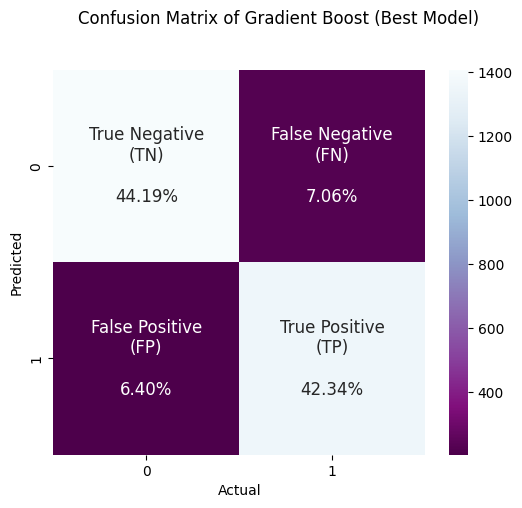

In [309]:
chart = 'Gradient Boost (Best Model)'

cm = confusion_matrix(y_test, best_gb_model.predict(X_test))

plot_cm(cm, chart)

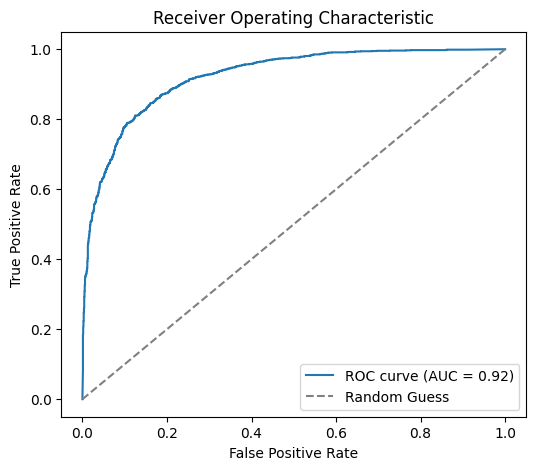

In [310]:
from sklearn.metrics import roc_curve, auc

y_prob = best_rf_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

**Trained Model Predictions**

In [311]:
# create a dataframe to store the predictions
predictions = pd.DataFrame({'Predicted': best_rf_model.predict(df.drop('churn', axis=1))})

# concatenate the predictions with the original train dataframe
result = pd.concat([predictions, df], axis=1).rename(columns={'churn': 'Actual'})

# Print the column names and their contents
print(result.columns)
print(result['Actual'].head())


Index(['Predicted', 'credit_score', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'Actual', 'country_Germany', 'country_Spain', 'gender_Male'],
      dtype='object')
0    1
1    0
2    1
3    0
4    0
Name: Actual, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [312]:
result

,Predicted,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,Actual,country_Germany,country_Spain,gender_Male
0,0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,0,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,1,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,1,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,0,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,0,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,0,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,1,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [314]:
# Create a DataFrame to store the predictions
predictions = pd.DataFrame({'Predicted': best_gb_model.predict(df.drop('churn', axis=1))})

# Concatenate the predictions with the original train DataFrame
result = pd.concat([predictions, df], axis=1).rename(columns={'churn': 'Actual'})

# Print the column names and their contents
print(result.columns)
print(result['Actual'].head())

# Select the desired columns for the result DataFrame
columns = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary', 'Actual', 'country_Germany', 'country_Spain', 'gender_Male', 'Predicted']
result = result[columns]

# Map the numerical labels to their corresponding Churn status
result.loc[:, 'Exited (Actual)'] = result['Actual'].map({1: 'Churn', 0: 'Retain'})
result.loc[:, 'Exited (Predicted)'] = result['Predicted'].map({1: 'Churn', 0: 'Retain'})

result.head()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


Index(['Predicted', 'credit_score', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'Actual', 'country_Germany', 'country_Spain', 'gender_Male'],
      dtype='object')
0    1
1    0
2    1
3    0
4    0
Name: Actual, dtype: int64


,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,Actual,country_Germany,country_Spain,gender_Male,Predicted,Exited (Actual),Exited (Predicted)
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0,0,Churn,Retain
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0,0,Retain,Retain
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0,0,Churn,Retain
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0,1,Retain,Churn
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0,0,Retain,Retain


In [315]:
# export data to csv file
result.to_csv('result.csv', index=False)

 The developed customer churn prediction model using the **Random Forest classifier** holds significant promise in aiding our business to reduce customer churn and enhance customer retention efforts With an  recall and ROC-AUC scores of 82.1% and 90% respectively

**Business Insights**




### 1.  Model Performance :

* The churn prediction model seems to have reasonable performance with an 82% recall, indicating that it can correctly identify a high proportion of actual churn cases. Additionally, the ROC-AUC score of 90% indicates that the model has good discrimination power to distinguish between churn and non-churn instances.

### 2.Demographic Insights:

* Female customers have a higher churn percentage (11.4%) compared to male customers (9%). This observation might prompt further investigation into the reasons behind the higher churn rate among female customers.
* Customers in the 40-50 age group exhibit the highest churn rate. Understanding the factors leading to higher churn in this age group can be valuable for targeted retention efforts.
* Churn percentages vary across different countries, with France and Germany having a churn percentage of 8.1% each and Spain with 4.1%. Analyzing country-specific trends could help in tailoring retention strategies.

### 3. Customer Engagement Insights:

* Inactive members have a higher churn percentage (13%) compared to active customers. Encouraging inactive customers to engage more with the bank's products and services might reduce churn.
* Customers with credit cards have a higher churn percentage (14.2%) compared to those without credit cards (6.1%). Understanding the reasons behind this trend can help in designing retention strategies for credit card holders.

### 4.Product Insights:

* Customers who purchased at least one product through the bank have a higher churn percentage (14.1%). Understanding the relationship between customer purchases and churn behavior can lead to targeted product offerings and promotions.

### 5. Credit Score, and Balance Distribution:


* The credit score distribution being similar for churn and retain customers suggests that creditworthiness might not be the primary driver of churn.
* The balance distribution for churned and retained customers also doesn't show a clear distinction, indicating that account balance alone might not be the main factor influencing churn.


Overall, the business insights gleaned from the churn prediction model and the observed data provide valuable directions for customer retention strategies. Further analysis and targeted actions based on these insights can help the bank in reducing churn, improving customer loyalty, and enhancing overall business performance.